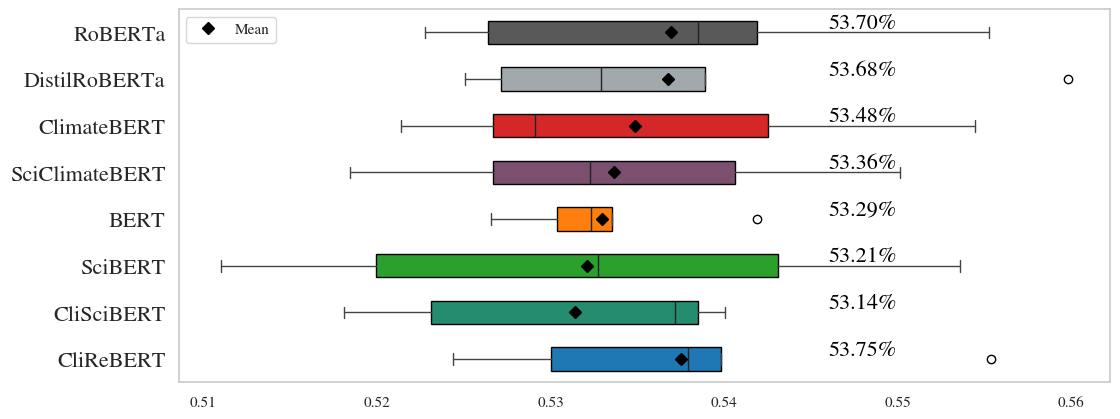

In [88]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV
df = pd.read_csv("/home/p0l3/Downloads/wandb_export_2025-05-08T13_32_11.012+02_00.csv")

# Mapping function
def mapper(name):
    if "_name_or_path: FacebookAI/roberta-base" in name:
        return "RoBERTa"
    if "distilbert/distilroberta-bas" in name:
        return "DistilRoBERTa"
    if "_name_or_path: MODELS/SciClimateBERT_10e_21102" in name:
        return "SciClimateBERT"
    if "_name_or_path: MODELS/CliReBERT_clirevocab_10e" in name:
        return "CliReBERT"
    if "name_or_path: google-bert/bert-base-uncased" in name:
        return "BERT"
    if "MODELS/CliSciBERT_10e" in name:
        return "CliSciBERT"
    if "allenai/scibert_scivocab_uncased" in name:
        return "SciBERT"
    if "climatebert/distilroberta-base" in name:
        return "ClimateBERT"
    else:
        return "Unknown"

df["Name"] = df["Name"].apply(mapper)

# Desired order and colors
label_order = [
    "RoBERTa", "DistilRoBERTa", "ClimateBERT", "SciClimateBERT",
    "BERT", "SciBERT", "CliSciBERT", "CliReBERT"
]
hex_colors = [
    "#595959", "#A1A9AD", "#D62728", "#7B4F6E",
    "#FF7F0E", "#2CA02C", "#268C70", "#1F77B4"
]

label_order.reverse()
hex_colors.reverse()

# Filter to known labels
df = df[df["Name"].isin(label_order)]

# Gather data, skip empty entries
data_full = [
    (
        label,
        df[df["Name"] == label]["test_f1_macro"].tolist(),
        color
    )
    for label, color in zip(label_order, hex_colors)
]

# Remove empty groups and warn
filtered = []
for label, values, color in data_full:
    if len(values) == 0:
        print(values)
        print(f"⚠️ Warning: No data found for '{label}' — it will be excluded.")
    else:
        filtered.append((label, values, color))

# Unpack filtered data
label_order, data, hex_colors = zip(*filtered)
means = [sum(vals) / len(vals) for vals in data]

# Plotting
plt.rcParams["font.family"] = "Nimbus Roman"

plt.figure(figsize=(14, 7))


# Boxplot
box = plt.boxplot(data, vert=False, patch_artist=True)

# Apply custom colors
for patch, color in zip(box["boxes"], hex_colors):
    patch.set_facecolor(color)
for whisker in box['whiskers']:
    whisker.set_color('#444444')
for cap in box['caps']:
    cap.set_color('#444444')
for median in box['medians']:
    median.set_color('#222222')

# Overlay means and annotate
for i, mean in enumerate(means, start=1):
    plt.plot(mean, i, marker="D", color="black")
    plt.text(0.546, i + 0.2, f"{mean*100:.2f}%", va='center', ha='left', fontsize=16, color='black')

# Add manual legend entry for Mean
plt.plot([], [], marker="D", color="black", linestyle="None", label="Mean")



plt.grid(False)
plt.yticks(range(1, len(label_order) + 1), label_order, fontsize=16)
plt.ylabel("")
plt.legend(loc="upper left")
plt.tight_layout()


figure = plt.gcf() # get current figure
# figure.set_size_inches(16, 9)
plt.savefig(f"./figure1", dpi=600)


                                                 Name  \
0              _name_or_path: FacebookAI/roberta-base   
1              _name_or_path: FacebookAI/roberta-base   
2              _name_or_path: FacebookAI/roberta-base   
3              _name_or_path: FacebookAI/roberta-base   
4              _name_or_path: FacebookAI/roberta-base   
5   _name_or_path: climatebert/distilroberta-base-...   
6   _name_or_path: climatebert/distilroberta-base-...   
7   _name_or_path: climatebert/distilroberta-base-...   
8   _name_or_path: climatebert/distilroberta-base-...   
9   _name_or_path: climatebert/distilroberta-base-...   
10    _name_or_path: MODELS/SciClimateBERT_10e_211024   
11    _name_or_path: MODELS/SciClimateBERT_10e_211024   
12    _name_or_path: MODELS/SciClimateBERT_10e_211024   
13    _name_or_path: MODELS/SciClimateBERT_10e_211024   
14    _name_or_path: MODELS/SciClimateBERT_10e_211024   
15  _name_or_path: MODELS/CliReBERT_clirevocab_10e...   
16  _name_or_path: MODELS/CliRe